In [19]:
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import Dense, Activation
from keras.initializers import glorot_uniform  # Or your initializer of choice
import sklearn.datasets as datasets
import numpy as np
from keras.optimizers import SGD
import tensorflow as tf
import keras

# Building the perceptron (no Keras)

In [56]:
input_neurons = 3
output_neurons = 2
network = np.random.uniform(-1.0, 1.0, (input_neurons, output_neurons))

def activation(x):
    return 0 if x>0 else 1

def feed_forward(example, network):
    final_result = []
    for out_neuron in range(network.shape[1]):
        f = map(lambda x,y: return x*y, zip(example, network[:, out_neuron]))
        final_result.append(activation(sum(f)))
    return final_result

# Online training
def train(examples, network):
    for e in examples:
        final_result = feed_forward(e, network)
        # 

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([3, 6])

# AND operand network

In [38]:
dataset = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])
colors = ['black', 'black', 'black','red']

print(dataset.shape)
print(targets.shape)

def binary_activation(x):
    cond = tf.less(x, tf.zeros(tf.shape(x)))
    out = tf.where(cond, tf.zeros(tf.shape(x)), tf.ones(tf.shape(x)))
    return out

def custom_activation(x):
    return (K.sigmoid(x) * 5) - 1

and_network = Sequential([
    Dense(1, input_dim=2),
    Activation("sigmoid")
])

and_network.compile(optimizer=SGD(lr = 0.3),
                    loss='mse',
                    metrics=['acc'])

history = and_network.fit(dataset, targets, epochs=10, batch_size=1, verbose=0)
K

(4, 2)
(4,)


<module 'keras.backend' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/__init__.py'>

In [39]:
w, b = and_network.get_weights()
print("weights: ", w)
print("bias: ", b)
print("accuracy: ", history.history['acc'][-1])

weights:  [[ 1.1992279 ]
 [-0.28550366]]
bias:  [-0.9622564]
accuracy:  0.5


[-3.370382]
[(-1, -7.570776), (0, -3.370382), (1, 0.8300121), (2, 5.030406)]
--------------
Predictions: 
[0 0] 0 [0] [0.]
[0 1] 0 [0] [1.1992279]
[1 0] 0 [1] [1.1992279]
[1 1] 1 [0] [2.3984559]


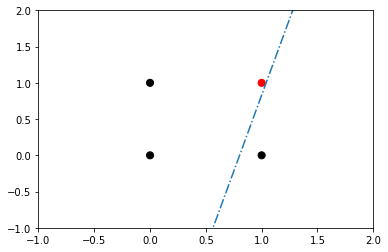

In [40]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(list(map(lambda x: x[0], dataset)),
            list(map(lambda x: x[1], dataset)),
            c=colors,
            s=50)
x_decision_hyperplane = list(range(-1,3))
print(-(w[0]/w[1])*0 -(b/w[1]))
y_decision_hyperplane = list(map(lambda x: (-(w[0]/w[1])*x -(b/w[1]))[0], x_decision_hyperplane))
print(list(zip(x_decision_hyperplane, y_decision_hyperplane)))
predicted = and_network.predict_classes(dataset)
print("--------------")
print("Predictions: ")
for ex, t, ac in zip(dataset, targets, predicted):
    print(ex, t, ac, ex[0]*w[0]+ex[1]*w[0])

plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
plt.show()

#[-0.3442232]
#[(-1, 0.52184135), (0, -0.3442232), (1, -1.2102878), (2, -2.0763524)]
#--------------
#Predictions: 
#[0 0] 0 [0] [0.]
#[0 1] 0 [1] [0.6737635]
#[1 0] 0 [1] [0.6737635]
#[1 1] 1 [1] [1.347527]

# OR operand network

In [ ]:
dataset = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([1, 1, 1, 0])

print(dataset.shape)
print(targets.shape)

or_network = Sequential([
    Dense(1, input_dim=2),
    Activation('sigmoid')
])

or_network.compile(optimizer=SGD(lr = 0.25),
                    loss='mse',
                    metrics=['accuracy'])



#initial_weights = or_network.get_weights()
#with sess.as_default():
#    new_weights = [glorot_uniform()(w.shape).eval() for w in initial_weights]
#or_network.set_weights(new_weights)

or_network.fit(dataset, targets, epochs=100, batch_size=1, verbose=0)

In [ ]:
w, b = and_network.get_weights()
print("weights: ", w)
print("bias: ", b)

In [ ]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(list(map(lambda x: x[0], dataset)),
            list(map(lambda x: x[1], dataset)),
            c=colors,
            s=50)
x_decision_hyperplane = list(range(-1,3))
y_decision_hyperplane = list(map(lambda x: (-(w[0]/w[1])*x -(b/w[1]))[0], x_decision_hyperplane))
print(list(zip(x_decision_hyperplane, y_decision_hyperplane)))
plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
plt.show()

# NOT operand network

In [ ]:
dataset = np.array([0, 1])
targets = np.array([1, 0])

print(dataset.shape)
print(targets.shape)

not_network = Sequential([
    Dense(1, input_dim=1),
    Activation('relu')
])

not_network.compile(optimizer=SGD(lr = 0.5),
                    loss='mse',
                    metrics=['accuracy'])

not_network.fit(dataset, targets, epochs=200, batch_size=1, verbose=0)

In [ ]:
w, b = and_network.get_weights()
print("weights: ", w)
print("bias: ", b)

In [ ]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(list(map(lambda x: x[0], dataset)),
            list(map(lambda x: x[1], dataset)),
            c=colors,
            s=50)
x_decision_hyperplane = list(range(-1,3))
y_decision_hyperplane = list(map(lambda x: (-(w[0]/w[1])*x -(b/w[1]))[0], x_decision_hyperplane))
print(list(zip(x_decision_hyperplane, y_decision_hyperplane)))
plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
plt.show()

In [ ]:
# Training with Iris dataset

In [ ]:
dataset = datasets.load_iris()
print(dataset.keys())

n_features = len(dataset.feature_names)
one_hot_labels = keras.utils.to_categorical(dataset.target, num_classes=10)
print(n_features)
print(dataset.data.shape)
print(one_hot_labels.shape)

model = Sequential([
    Dense(5, input_dim=n_features, activation='relu')
])
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
print(one_hot_labels)
model.fit(dataset.data, one_hot_labels, epochs=100, batch_size=32)

In [ ]:
?model